# IMB Sendrecv performance comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,4)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip

In [4]:
from synthanalysis import imb

In [5]:
benchmark = "Sendrecv"
systems = ['ARCHER_CrayMPICH774',
           'ARCHER2_CrayMPICH8015',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = []
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            tlist = imb.get_perf_dict(imbfiles[0], nodes, system)
            imb_perf.extend(tlist)
imb_df = pd.DataFrame(imb_perf)
imb.get_perf_stats(imb_df)

                                                   Perf                      \
                                                    min    median       max   
System                Nodes Processes Size                                    
ARCHER2_CrayMPICH8015 1     128       0            0.00      0.00      0.00   
                                      1            1.67      1.67      1.67   
                                      2            3.08      3.08      3.08   
                                      4            4.96      4.96      4.96   
                                      8            9.25      9.25      9.25   
...                                                 ...       ...       ...   
Tesseract_IMPI181     32    768       262144    9725.89   9725.89   9725.89   
                                      524288   10866.08  10866.08  10866.08   
                                      1048576   7050.98   7050.98   7050.98   
                                      2097152   3901

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:41: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


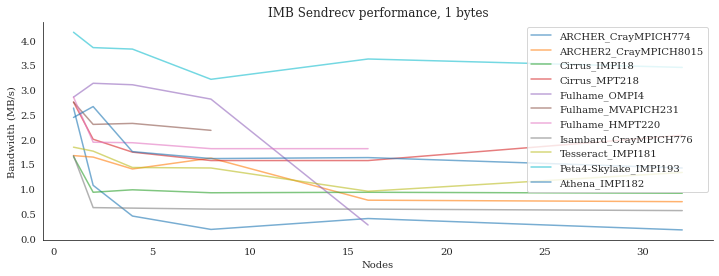

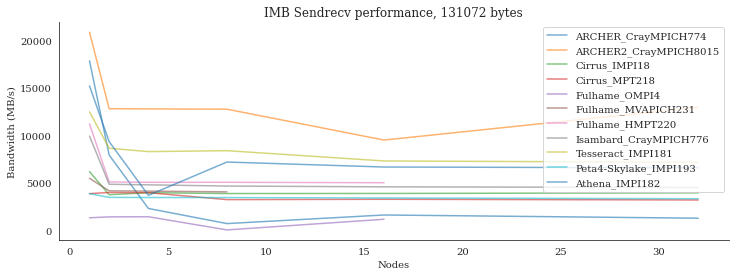

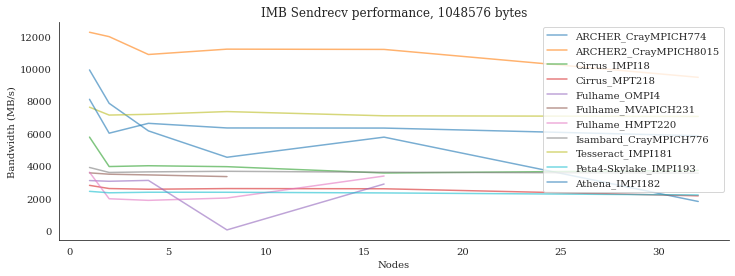

In [6]:
sizelist = [1, 131072, 1048576]
# Plot performance
for size in sizelist:
    plt.clf()
    for system in systems:
        nodes, perf = imb.get_node_scaling_df(imb_df, system, size, 'max')
        plt.plot(nodes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xlabel("Nodes")
    plt.ylabel("Bandwidth (MB/s)")
    plt.title(f'IMB {benchmark} performance, {size} bytes')
    plt.legend(loc='best')
    plt.show()
    

/home/jovyan/work/synth/IMB/analysis/../../../python-modules/synthanalysis/imb.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_num = df.drop(['File', 'Date'], 1)


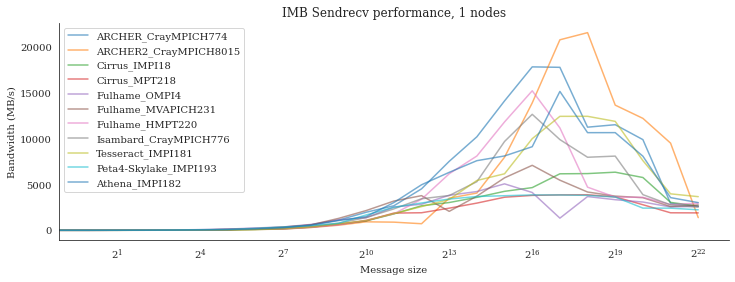

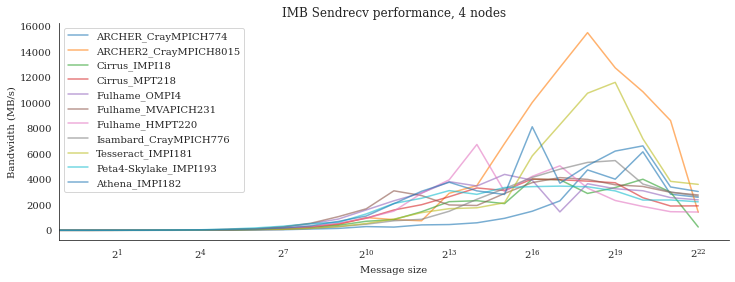

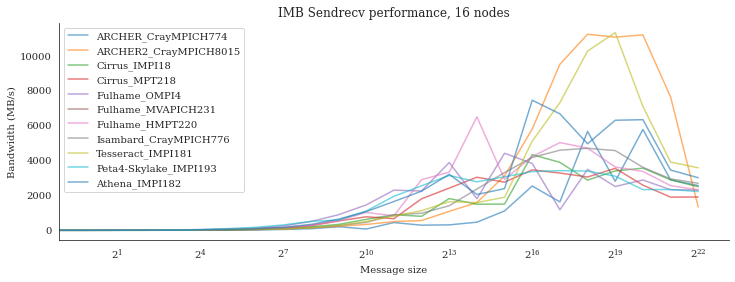

In [7]:
nodelist = [1, 4, 16]
# Plot performance
for node in nodelist:
    plt.clf()
    for system in systems:
        sizes, perf = imb.get_size_scaling_df(imb_df, system, node, 'max')
        plt.plot(sizes, perf, label=f'{system}', alpha=0.6)
    sns.despine()
    plt.xscale('log', base=2)
    plt.xlabel("Message size")
    plt.ylabel("Bandwidth (MB/s)")
    plt.title(f'IMB {benchmark} performance, {node} nodes')
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Compute performance ratio
imb.get_perf_ratio(imb_df, 'ARCHER_CrayMPICH774', systems, 'max', invert=False)

ARCHER_CrayMPICH774 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1         2         4         8        16        32
           0     0.000     0.000     0.000     0.000     0.000     0.000
           1     1.000     1.000     1.000     1.000     1.000     1.000
           2     1.000     1.000     1.000     1.000     1.000     1.000
           4     1.000     1.000     1.000     1.000     1.000     1.000
           8     1.000     1.000     1.000     1.000     1.000     1.000
          16     1.000     1.000     1.000     1.000     1.000     1.000
          32     1.000     1.000     1.000     1.000     1.000     1.000
          64     1.000     1.000     1.000     1.000     1.000     1.000
         128     1.000     1.000     1.000     1.000     1.000     1.000
         256     1.000     1.000     1.000     1.000     1.000     1.000
         512     1.000     1.000     1.000     1.000     1.000     1.000
        1024     1.000     1.000

         512     1.029     1.650     5.887     0.001     4.330
        1024     0.697     1.895     5.456     0.010    19.722
        2048     0.950     1.837     9.147     0.001     5.176
        4096     0.629     1.525     6.895     0.004     7.660
        8192     0.508     1.530     8.443     0.037    12.433
       16384     0.414     1.064     5.897     0.001     3.892
       32768     0.359     0.780     4.658     0.019     3.982
       65536     0.231     0.514     2.625     0.003     1.509
      131072     0.075     0.180     0.625     0.079     0.723
      262144     0.327     0.439     0.771     0.005     0.616
      524288     0.290     0.397     0.812     0.006     0.893
     1048576     0.312     0.388     0.504     0.011     0.499
     2097152     0.866     0.907     0.906     0.026     0.804
     4194304     0.997     0.961     0.922     0.259     0.901
Fulhame_MVAPICH231 performance ratio to ARCHER_CrayMPICH774 performance
            #nodes
      #bytes         1     

           4     1.594     3.734     7.882     8.884     6.015    20.857
           8     1.610     3.681     9.808     9.121     6.786    17.000
          16     1.607     2.436     6.063     7.829    18.841    46.750
          32     1.178     2.931     7.761     8.414    10.846    18.910
          64     1.473     2.726     6.076    18.317     7.551    29.957
         128     1.186     2.453     6.980    18.653     6.417    13.413
         256     0.865     1.832     5.239     6.982     5.666    44.695
         512     0.693     1.321     4.204     7.358     2.866    13.809
        1024     0.850     1.542     4.380    15.165    14.944    28.162
        2048     0.938     1.625     8.319    12.408     4.381     5.419
        4096     0.659     1.357     5.913    12.160     8.673     2.732
        8192     0.453     1.282     6.889    10.681    10.063    13.467
       16384     0.361     0.690     4.787     5.108     5.975     7.358
       32768     0.267     0.616     3.567     4.00